In [3]:
import pandas as pd

# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
print data.head()
print data.shape

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

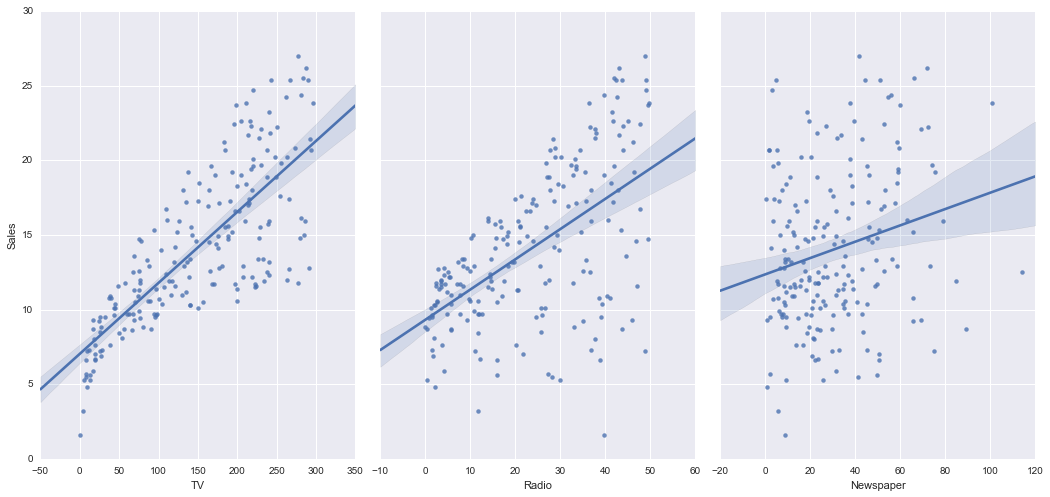

In [6]:
import seaborn as sns
%matplotlib inline
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

##  Regression method

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

### Splitting X and y into training and testing sets

In [88]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=1)

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150L,)
(50, 3)
(50L,)


### 1. Ordinary Linear Square Regression

In [90]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111803788)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [91]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print y_pred, "\n"

## MSE measurement
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, y_pred)

## R square measurement
from sklearn.metrics import r2_score
print r2_score(y_test,y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679] 

1.97304562023
0.915621361379


In [95]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train, y_train, cv=10)
print scores

# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

[ 0.94503064  0.86467917  0.90344686  0.6926448   0.82685811  0.76598063
  0.89268039  0.91457787  0.94198095  0.83985778]
0.858773719814


## 2. Randdom Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [74]:
y_pred = rf.predict(X_test)
print y_pred, '\n'

## MSE measurement
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, y_pred)

## R square measurement
from sklearn.metrics import r2_score
print r2_score(y_test,y_pred)

[ 21.86  16.43   9.58  13.26  16.31  25.22  17.09  13.43  10.66  16.8
  14.94  10.42  16.96  15.24  13.2   15.25  13.54  12.51   7.34  17.73
  10.14  12.18   7.49  12.22  12.23  14.97   9.95  19.71  18.86  15.48
  23.25  12.1   15.97  12.21  20.36  15.34  12.4   10.99  21.39   6.96
   5.76   9.97   6.77  17.92   6.53  14.14  14.21  21.67  21.67  20.12] 

0.61683
0.973620845293


In [79]:
dir(rf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'criterion',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_features_',
 'n_jobs',
 'n_outputs_',
 'oob_score',
 'predict',
 'random_state'

## 3. Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [66]:
y_pred = dt.predict(X_test)
print y_pred

## MSE measurement
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, y_pred)

## R square measurement
from sklearn.metrics import r2_score
print r2_score(y_test,y_pred)

[ 25.4  16.6   9.7  13.4  17.4  24.4  17.1  14.1  11.3  17.   14.9  10.9
  17.   15.3  13.4  18.5  12.2  12.7   4.8  18.3  10.6  12.6   7.2  12.4
  13.2  14.4  10.1  19.8  18.   15.5  21.7  11.7  18.   12.9  20.2  14.9
  12.5  11.2  21.7   6.6   5.9   9.6   6.6  20.1   6.6  15.6  13.6  21.8
  21.7  20.1]
1.2274
0.947509403745
